In [1]:
import os
import sys
from tqdm.notebook import tqdm
import numpy as np
import csv
import pickle
import json

from multiprocessing import Pool

sys.path.append('/usr/local/Cellar/graph-tool/2.35/lib/python3.8/site-packages/')
import graph_tool.all as gt

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from matplotlib.animation import FuncAnimation
%matplotlib inline

/usr/local/Cellar/graph-tool/2.35/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:32: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/local/Cellar/graph-tool/2.35/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:32: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/local/Cellar/graph-tool/2.35/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:32: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/usr/local/Cellar/graph-tool/2.35/lib/python3.8/site-packages/graph_tool/all.py:39: RuntimeWarning: Error importing draw module, proceeding nevertheless: No module named 'cairo'
  warnings.warn(msg, RuntimeWarning)


In [2]:
DUMP_LANG = 'en'
DUMP_DATE = '20201220'
RESULTS_DIR = '../results/'
graph_file = RESULTS_DIR + f"{DUMP_LANG}wiki-{DUMP_DATE}-graph.gt"
betweenness_file = RESULTS_DIR + f"{DUMP_LANG}wiki-{DUMP_DATE}-graph-betweenness.pkl"

In [3]:
graph = gt.load_graph(graph_file)
id_index_map = np.zeros((np.max(graph.vp.id.a)+1,), 'int')
id_index_map[graph.vp.id.a] = graph.get_vertices()


In [4]:
graph.num_vertices()

6209017

In [5]:
title_index_map = {}
for v in tqdm(graph.vertices()): title_index_map[graph.vp.title[v]] = v

In [6]:
largest_component_filter = gt.label_largest_component(graph)
lc_graph = gt.GraphView(graph, largest_component_filter)


In [7]:
lc_graph.num_vertices()

5601913

In [8]:
d = graph.get_out_degrees(graph.get_vertices())

In [9]:
sum(d > 20)

2362359

## Analysis

In [10]:
plt.style.use('fivethirtyeight')

### Furthest away pages

In [22]:
d,e = gt.pseudo_diameter(graph, np.random.choice(list(graph.vertices())))
print(d)
print(list(map(lambda v: graph.vp.title[v], e)))

48.0
['Nong Khai railway station', '1948–49 FC Dinamo București season']


In [12]:
source = 'United States'

dist, pred = gt.shortest_distance(lc_graph, title_index_map[source], pred_map=True)
for v in np.argsort(dist.a)[::-1]:
    if dist[v] < 10: break
    print(dist[v], lc_graph.vp.title[v])

46 1948–49 FC Dinamo București season
45 1950 FC Dinamo București season
44 1968 Liga Deportiva Universitaria de Quito season
44 1951 FC Dinamo București season
43 1969 Liga Deportiva Universitaria de Quito season
43 1952 FC Dinamo București season
42 Papyrus Oxyrhynchus 158
42 1953 FC Dinamo București season
42 1970 Liga Deportiva Universitaria de Quito season
41 Papyrus Oxyrhynchus 157
41 1971 Liga Deportiva Universitaria de Quito season
41 1954 FC Dinamo București season
40 1955 FC Dinamo București season
40 1972 Liga Deportiva Universitaria de Quito season
40 Papyrus Oxyrhynchus 156
39 1979 Empress's Cup Final
39 Mitsubishi Yowa Sugamo Ground
39 1973 Liga Deportiva Universitaria de Quito season
39 1956 FC Dinamo București season
39 Papyrus Oxyrhynchus 155
38 Papyrus Oxyrhynchus 154
38 Papyrus Oxyrhynchus 150
38 Papyrus Oxyrhynchus 149
38 1974 Liga Deportiva Universitaria de Quito season
38 1957–58 FC Dinamo București season
38 1980 Empress's Cup Final
37 Estádio Juca Ribeiro
37 Pap

12 1973–74 VfL Bochum season
12 Anametalia regularis
12 Billy Pye
12 First Pourier cabinet
12 1951–52 Spartan League
12 1981 NCAA Division I baseball rankings
12 Jon Ander Lambea
12 2007 Australia national soccer team season
12 Geoff Martin (English footballer)
12 Shamsul Haque
12 Results breakdown of the 1991 Spanish local elections (Navarre)
12 WNKX
12 Dwayne Jones
12 1911–12 Cornell Big Red men's ice hockey season
12 Caieiras (CPTM)
12 Yekan
12 Wayman Hill
12 2000 Liga Deportiva Universitaria de Quito season
12 2003 Dutch Figure Skating Championships
12 Results breakdown of the 1991 Spanish local elections (Castile and León)
12 Results breakdown of the 1991 Spanish local elections (Region of Murcia)
12 Billboard Top Hits: 1976
12 Real Time with Bill Maher (season 7)
12 Acanthocidaris hastingeria
12 The Price of Murder
12 List of peers 1400–1409
12 List of 1991 Seattle Mariners draft picks
12 1976 Emperor's Cup Final
12 Dwayne Washington
12 List of Healin' Good Pretty Cure episodes
1

10 Bill Patton
10 1651 in Sweden
10 Coope
10 1909–10 Heart of Midlothian F.C. season
10 Březno
10 1592 in France
10 1979–80 All-Ireland Senior Club Football Championship
10 1934 Waterford Senior Hurling Championship
10 1717 in Sweden
10 List of peers 1130–1139
10 Ritesh Negi
10 1983 Monegasque municipal elections
10 12th Robert Awards
10 2018 Indonesia national football team results
10 Shah Mahatab Ahmad
10 List of members of the 1st Jatiya Sangsad
10 Jixian station
10 Deyan Velkov
10 John Yates (footballer, born 1929)
10 Wulihe station
10 1950 Meath Intermediate Football Championship
10 East Second Street Commercial Historic District
10 1533 in Sweden
10 Joe Feeney (footballer)
10 Signori
10 Duncan, Casey County, Kentucky
10 Pressterror
10 Anil Kumar (disambiguation)
10 Alexander Buchan (mathematician)
10 2009–10 Alaska Aces season
10 Zhiyin station
10 Tanrui
10 1975–76 VfL Bochum season
10 Huazhaobi station
10 George Nelson Frost House, Cherry Creek, New York
10 Henry Sherburne House

10 The Rabbi
10 2007–08 Australian Athletics Championships
10 Montenegro at the 2017 World Championships in Athletics
10 Last Tango
10 N20
10 Results breakdown of the 1999 Spanish local elections (Navarre)
10 Republic of Ireland national football team 2000s results
10 2009 Palanca Awards
10 Matthew Langley
10 Charles Breyer (soldier)
10 Leśnice railway station
10 1940 in Malaya
10 Cheese Hill
10 Kase (surname)
10 Antrechinus drygalskii
10 Zuko (name)
10 Foxtrot (disambiguation)
10 Cotton Hill (New York)
10 Mitchell–Arnold House
10 2013–14 Al-Mina'a SC season
10 Hanna Bekker vom Rath
10 1674 in Sweden
10 While (disambiguation)
10 Boba
10 1976 Tipperary Senior Hurling Championship
10 Papyrus Oxyrhynchus 38
10 2011 Down county football team season
10 Pandori, Bhulath
10 Mike Fleming (footballer)
10 1914 Limerick Senior Hurling Championship
10 Light side
10 Eric A. Spiegel
10 Skotfos Avis
10 Clapper Post
10 The Bright Side
10 Eggeling
10 Goes (surname)
10 Ingalls House (Mercer, Maine)
10 1

### Histogram of distances

In [26]:

sources = np.random.choice(list(graph.vertices()), 1000, replace=False)

def get_dists(source):
    return gt.shortest_distance(graph, source).a[graph.get_vertices()]

dist = np.concatenate(list(map(get_dists, tqdm(sources))))
u, ucount = np.unique(dist,return_counts=True)
ufreq = ucount / np.sum(ucount)

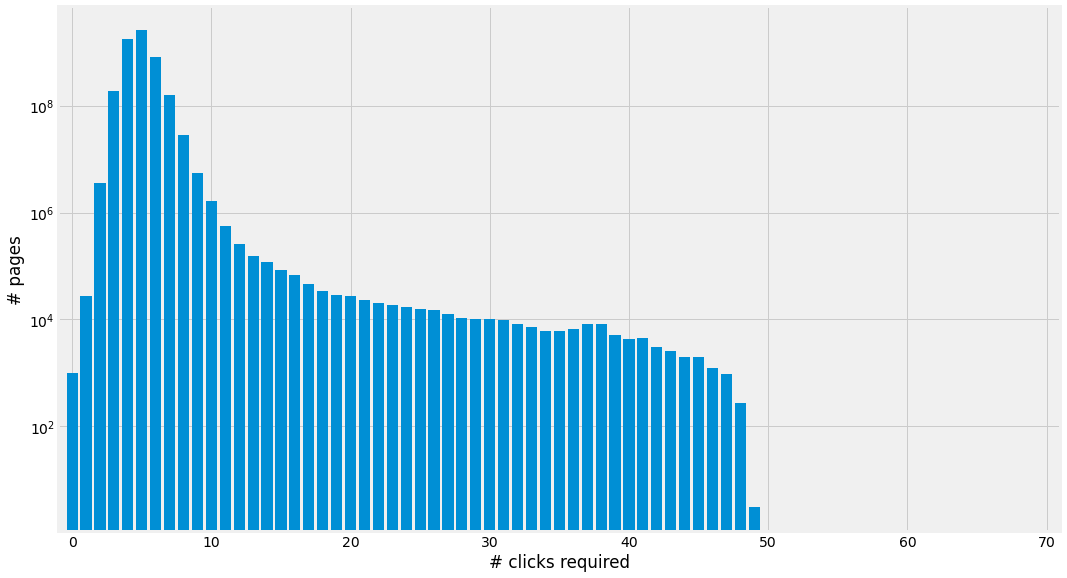

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
fig.patch.set_facecolor('white')

ax.bar(u, ucount)
ax.set_xlim(-1,71)
ax.set_xlabel('# clicks required')
ax.set_yscale('log')
ax.set_ylabel('# pages')
ax.label_outer()

plt.show()

In [34]:
possiblefreq = ufreq[u < 2e9]
possibleu = u[u < 2e9]

possiblefreq /= np.sum(possiblefreq)

with open(RESULTS_DIR + f"{DUMP_LANG}wiki-{DUMP_DATE}-path-length-frequency.json", "w") as f:
    json.dump([{"x": int(i[0]), "y": i[1]} for i in zip(possibleu,possiblefreq)], f)

In [70]:
list(zip(possibleu, np.cumsum(possiblefreq)))

[(0, 1.787478531493566e-07),
 (1, 5.07036160243465e-06),
 (2, 0.0006568826305128084),
 (3, 0.03443445492881516),
 (4, 0.35846795626900735),
 (5, 0.8211353269062089),
 (6, 0.9647351815717635),
 (7, 0.9933490538924216),
 (8, 0.9984233177392383),
 (9, 0.9994168640862524),
 (10, 0.9997117690867966),
 (11, 0.9998121681809535),
 (12, 0.9998577597871257),
 (13, 0.9998856144225776),
 (14, 0.9999063484585515),
 (15, 0.999921106596299),
 (16, 0.999933053387812),
 (17, 0.9999413135048539),
 (18, 0.9999474658272115),
 (19, 0.9999526632785375),
 (20, 0.9999574810694234),
 (21, 0.9999615754677477),
 (22, 0.9999651952905217),
 (23, 0.9999685280442437),
 (24, 0.9999715796275928),
 (25, 0.9999743139335023),
 (26, 0.9999770001562395),
 (27, 0.999979267215261),
 (28, 0.999981140492762),
 (29, 0.9999829265413106),
 (30, 0.9999847095511457),
 (31, 0.9999864405453556),
 (32, 0.9999879087802214),
 (33, 0.9999891716338039),
 (34, 0.999990248768367),
 (35, 0.9999913203617465),
 (36, 0.9999924757878693),
 (37, 

In [13]:
ucount

array([      10,      406,    44612,  2288048, 20232297, 22860260,
        7929600,  1756003,   296493,    50602,    14523,     5087,
           2357,     1433,     1022,      726,      568,      448,
            364,      317,      280,      246,      207,      193,
            176,      154,      146,      130,      114,      111,
            110,      106,      100,       78,       71,       70,
             72,       74,       85,       61,       53,       53,
             42,       35,       30,       30,       22,       20,
             13,       11,       10,       10,       10,       10,
             10,       10,       10,       10,       10,       10,
             10,       10,       10,       10,       10,       10,
             10,       10,       10,        1])

### Shortest path

In [24]:

source = '1948–49 FC Dinamo București season'
target = 'Nong Khai railway station'
print(title_index_map[source])
print(title_index_map[target])
path, _ = gt.shortest_path(graph, title_index_map[source], title_index_map[target])
print([graph.vp.title[v] for v in path])

4692422
4059878
['1948–49 FC Dinamo București season', 'Rudolf Wetzer', 'Greece', 'Metre-gauge railway', 'Rail transport in Thailand', 'Nong Khai railway station']


### Histogram of vertex degrees

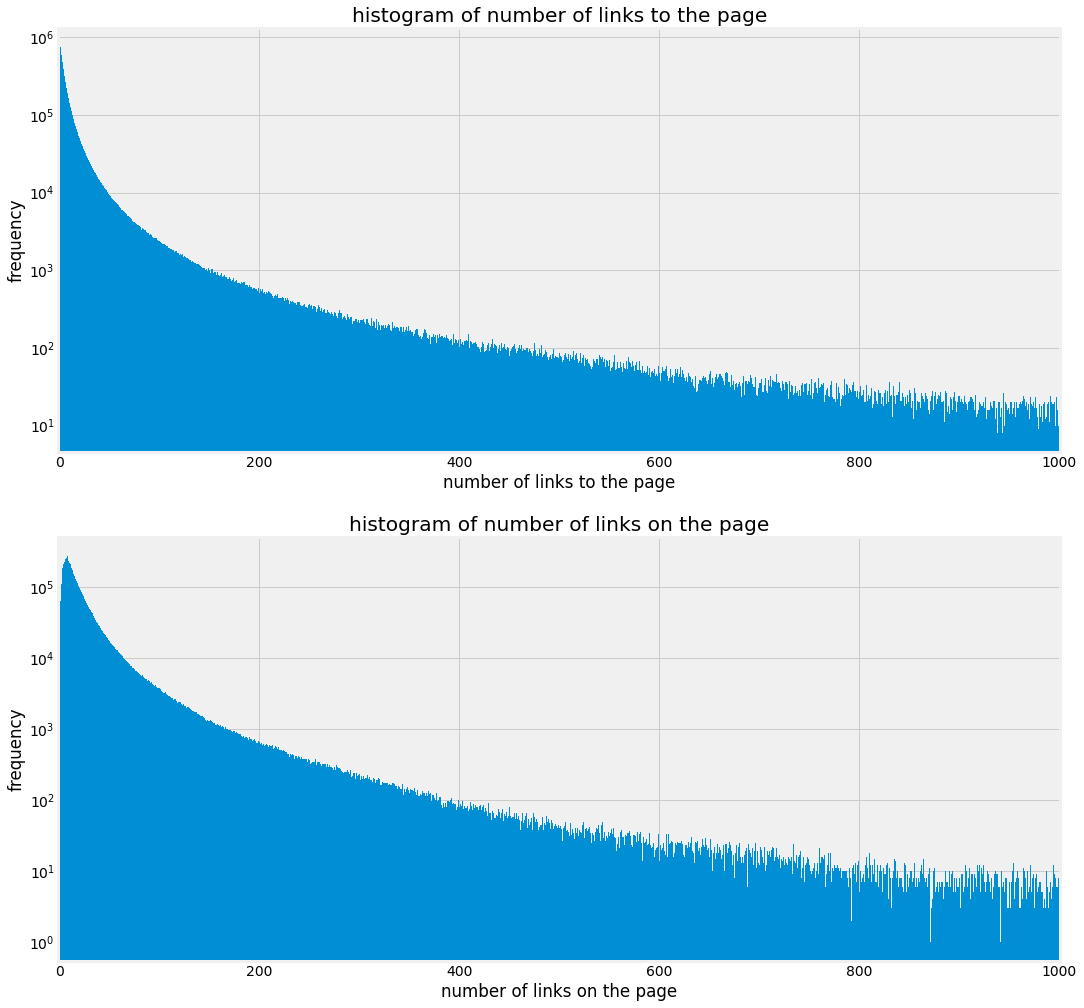

In [13]:
fig, axs = plt.subplots(2,figsize=(16,16))
fig.patch.set_facecolor('white')

lim = 1000

hist_type = ['number of links to the page','number of links on the page']

for (i,d) in enumerate(['in','out']):
    hist = gt.vertex_hist(lc_graph, d)[0]
    
    ax = axs.flat[i]
    ax.bar(np.arange(lim), hist[:lim])
    ax.set_title('histogram of ' + hist_type[i])
    ax.set_xlim(-1,lim+1)
    ax.set_xlabel(hist_type[i])
    ax.set_yscale('log')
    ax.set_ylabel('frequency')
#     ax.label_outer()

plt.show()


### Comparison of connectivity w/ and w/o countries

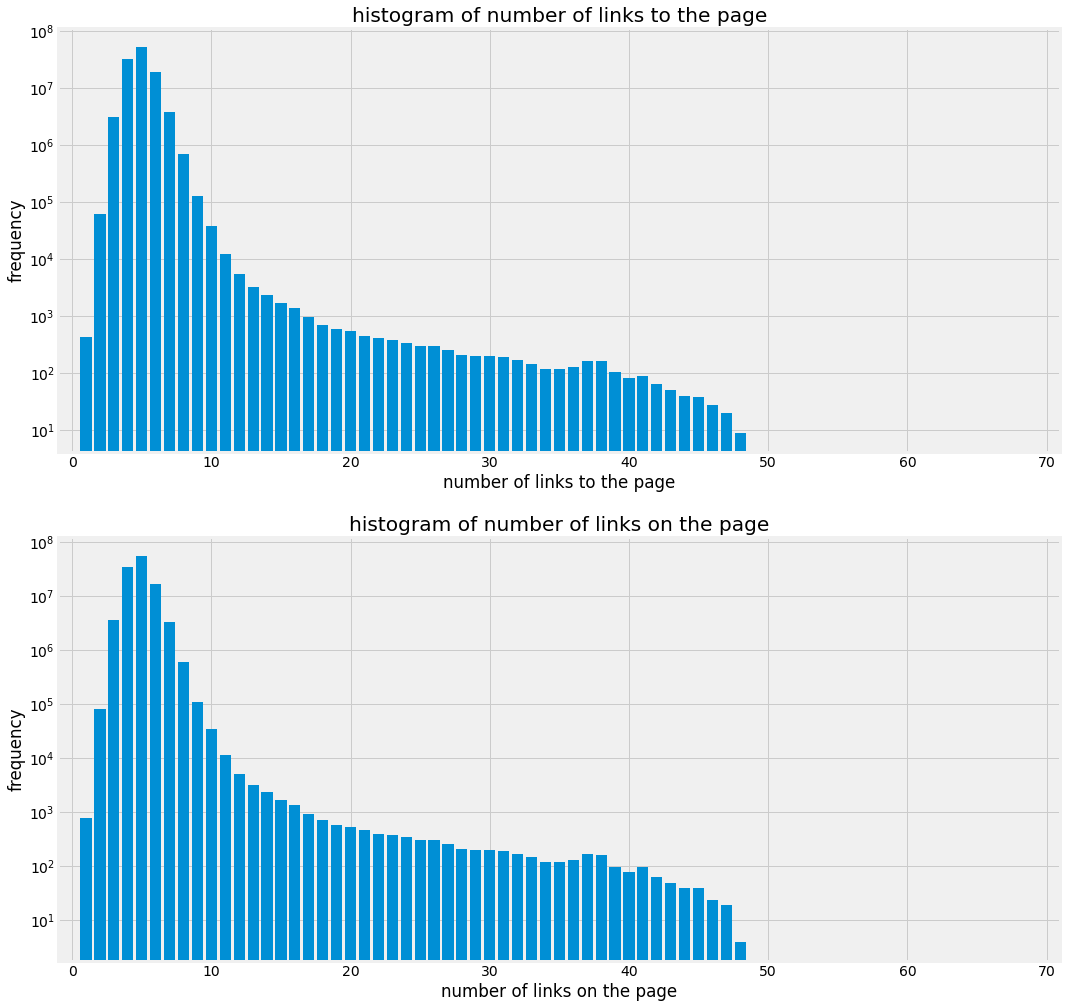

In [74]:
fig, axs = plt.subplots(2,figsize=(16,16))
fig.patch.set_facecolor('white')

hist_type = ['number of links to the page','number of links on the page']

cfilter = lc_graph.new_vp('bool',val=True)
with open('../tools/country-codes.pkl', 'rb') as f:
    d = pickle.load(f)
    for i in d:
        if d[i] in title_index_map: cfilter[title_index_map[d[i]]] = False

for i in range(2):
    lc_graph.set_vertex_filter([None,cfilter][i])
    hist = gt.distance_histogram(graph, samples=20)[0]
    lc_graph.clear_filters()
    
    ax = axs.flat[i]
    ax.bar(np.arange(hist.size), hist)
    ax.set_title('histogram of ' + hist_type[i])
    ax.set_xlabel(hist_type[i])
    ax.set_xlim(-1,71)
    ax.set_yscale('log')
    ax.set_ylabel('frequency')
#     ax.label_outer()

plt.show()


### Remove most central nodes from the graph

In [75]:
load_from_file = False
save_to_file = False

if load_from_file:
    with open(betweenness_file, 'rb') as f:
        vb_map = pickle.load(f)
else:
    vb_map = gt.betweenness(lc_graph, np.random.choice(lc_graph.get_vertices(), 1000, replace=False))[0]
    vb_map.a[np.setdiff1d(graph.get_vertices(), lc_graph.get_vertices(), assume_unique=True)] = -1
    
    if save_to_file:
        with open(betweenness_file, 'wb') as f:
            pickle.dump(vb_map, f)

In [76]:
bc = sorted([(vb_map[v], graph.vp.title[v]) for v in tqdm(graph.vertices())])[::-1]

with open(RESULTS_DIR + f"{DUMP_LANG}wiki-{DUMP_DATE}-betweenness-centrality.json", "w") as f:
    json.dump([{"title": t, "value": v} for v,t in bc[:100]], f)

In [77]:
bc

[(0.027084644450558665, 'United States'),
 (0.013772771687515624, 'France'),
 (0.012802301015325647, 'England'),
 (0.0117725771745414, 'India'),
 (0.011645080410608867, 'United Kingdom'),
 (0.010590801248148948, 'New York City'),
 (0.01029523390859112, 'Italy'),
 (0.009043017397033573, 'Association football'),
 (0.008954220793329715, 'Poland'),
 (0.008703954018105097, 'World War II'),
 (0.008438591722527436, 'Germany'),
 (0.007046133200917193, 'London'),
 (0.0068533551651214514, 'Australia'),
 (0.006827162671465684, 'Iran'),
 (0.006762012047436007, 'Russia'),
 (0.006719739407707188, 'List of sovereign states'),
 (0.006400127045949352, 'Köppen climate classification'),
 (0.0063978599942295395, 'Lepidoptera'),
 (0.0063957178343851135, 'Canada'),
 (0.006150098128817799, 'Brazil'),
 (0.006094607301126533, 'World War I'),
 (0.005783457805520426, 'China'),
 (0.0057737831824733405, 'California'),
 (0.005552611791173631, 'Japan'),
 (0.005455886688729291, 'Spain'),
 (0.005299808278671741, 'Neth

In [80]:
def distance_distribution(g, ind, starts, ends):
    u, ucount = np.unique(np.concatenate([gt.shortest_distance(g,v).a[ends] for v in starts]), return_counts=True)
    o = np.zeros(ind.size)
    o[u[u < 200]] = ucount[u < 200]
    return o / np.sum(ucount)

vertex_order = np.argsort(vb_map.a)[::-1]
ind = np.arange(200)

distributions = {}

point_range = (100, lc_graph.num_vertices()/3)

In [81]:
point_num = 100
kmin = 0
kmax = (point_range[1]/point_range[0])**(1/(point_num-1))
while kmax-kmin > 1e-9:
    m = (kmin+kmax)/2
    if (m**point_num-1)/(m-1) < point_range[1]/point_range[0]: kmin = m
    else: kmax = m

number_excluded = [0]
for i in range(point_num): number_excluded.append(number_excluded[-1] + point_range[0] * kmin**i)
number_excluded = [int(round(i)) for i in number_excluded]
print(number_excluded)

for p in tqdm(number_excluded):
    if p in distributions: continue
    alive = vertex_order[p:lc_graph.num_vertices()]
    f = lc_graph.new_vp('bool',False)
    f.a[alive] = True
    g = gt.GraphView(lc_graph,f)
    distributions[p] = distance_distribution(g, ind, np.random.choice(alive, 30, replace=False), alive)

[0, 100, 207, 323, 447, 581, 724, 878, 1044, 1222, 1413, 1618, 1839, 2077, 2332, 2606, 2901, 3218, 3558, 3924, 4317, 4740, 5194, 5682, 6207, 6771, 7377, 8028, 8728, 9480, 10288, 11157, 12091, 13094, 14173, 15332, 16577, 17916, 19355, 20901, 22563, 24349, 26268, 28331, 30548, 32931, 35492, 38244, 41202, 44380, 47797, 51468, 55414, 59655, 64212, 69111, 74375, 80032, 86113, 92648, 99671, 107218, 115330, 124048, 133417, 143487, 154309, 165940, 178439, 191873, 206310, 221827, 238503, 256425, 275686, 296386, 318633, 342543, 368239, 395855, 425535, 457433, 491714, 528557, 568153, 610708, 656443, 705595, 758420, 815192, 876207, 941780, 1012254, 1087994, 1169393, 1256875, 1350894, 1451939, 1560534, 1677243, 1802674]


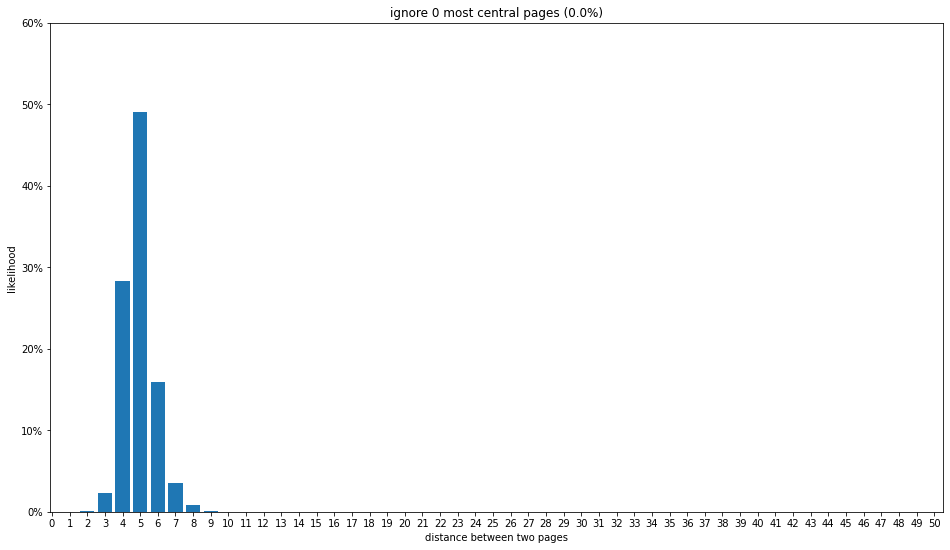

In [82]:
fig, ax = plt.subplots(figsize=(16,9))
bars = ax.bar(ind, np.zeros(ind.size))

ax.set_xlabel('distance between two pages')
ax.set_ylabel('likelihood')
ax.set_xticks(ind)
ax.set_xlim(-.1,50.5)
ax.set_ylim(0,.6)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
ax.grid(False,axis='x')

def update(i):
    n = number_excluded[i]
    for j,b in enumerate(bars):
        b.set_height(distributions[n][j])
    ax.set_title(f"ignore {n} most central pages ({n/lc_graph.num_vertices():.3}%)")

ani = FuncAnimation(fig, update, frames=range(len(number_excluded)), interval=250, repeat_delay=3000)

ani.save('removing_central_pages.mp4')

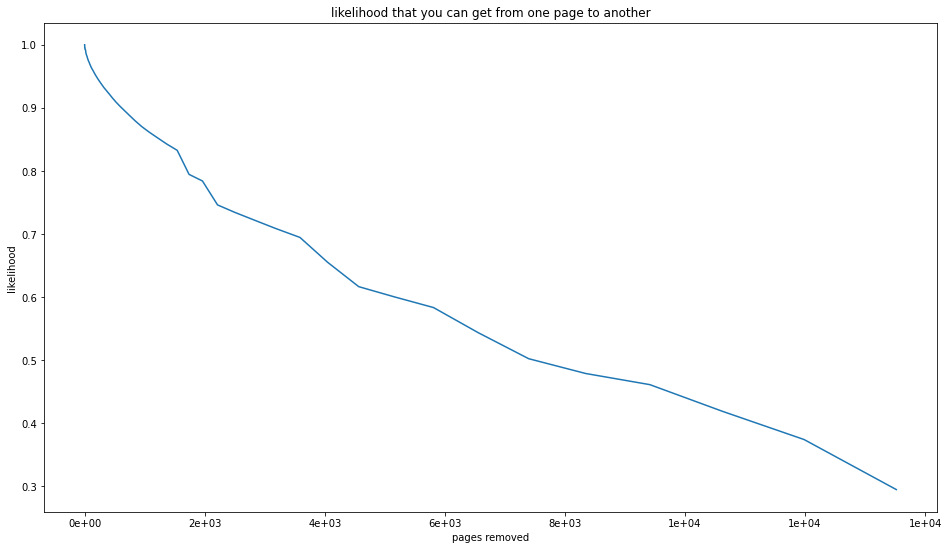

In [51]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(number_excluded,[np.sum(distributions[p]) for p in number_excluded])
ax.set_title('likelihood that you can get from one page to another')
ax.set_xlabel('pages removed')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0}'.format(x/100)))

ax.set_ylabel('likelihood')
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0}'.format(y)))

plt.show()

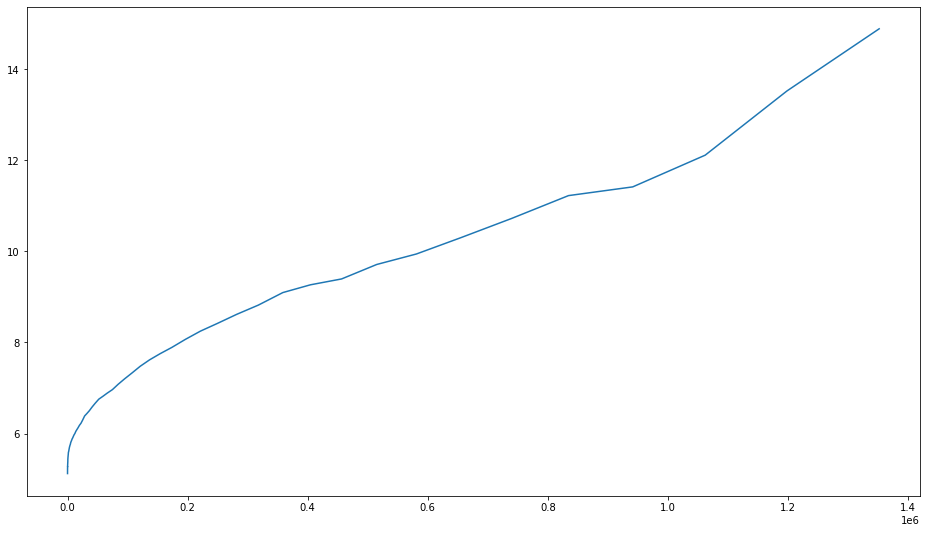

In [52]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(number_excluded, [np.dot(distributions[p],ind)/np.sum(distributions[p]) for p in number_excluded])

plt.show()

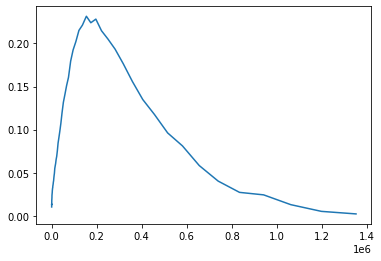

In [60]:
d = 8
plt.plot(number_excluded, [distributions[n][d] for n in number_excluded])

In [64]:
d = 5
[(n, distributions[n][d]) for n in number_excluded]

[(0, 0.5426549024132712),
 (1, 0.5450667847464112),
 (2, 0.5467213311453077),
 (3, 0.5474884961006071),
 (5, 0.5475022945340123),
 (6, 0.5475475441911472),
 (8, 0.546752954952183),
 (10, 0.54655307901481),
 (13, 0.54620580063458),
 (15, 0.5465770927267875),
 (18, 0.5446882195073524),
 (22, 0.5442090793856171),
 (25, 0.5427143038883476),
 (30, 0.542605412141701),
 (34, 0.5413252972046133),
 (40, 0.5384141811406398),
 (46, 0.5373188780977853),
 (53, 0.5366851774417721),
 (61, 0.5364507930935184),
 (69, 0.5359012472666117),
 (79, 0.5349211311460967),
 (90, 0.5330678675823765),
 (103, 0.5313641842964459),
 (117, 0.5305151902753835),
 (133, 0.5288841069660475),
 (151, 0.5281078444135),
 (172, 0.5259297629332166),
 (195, 0.5252977059262094),
 (221, 0.5234299700329913),
 (250, 0.5209847380615198),
 (283, 0.5178860816459633),
 (320, 0.5160617956142185),
 (362, 0.5123196917040432),
 (410, 0.5091342013115004),
 (464, 0.5042782868706632),
 (524, 0.4809568634180273),
 (592, 0.47588902509260317),
 

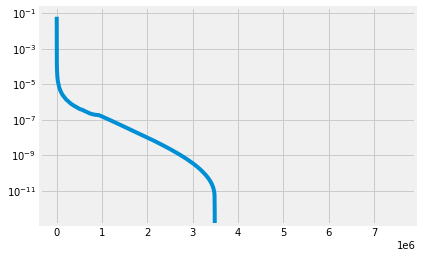

In [201]:
fig,ax = plt.subplots()
ax.plot(np.sort(vb)[::-1])
ax.set_yscale('log')
plt.show()


In [25]:
di, p = gt.pseudo_diameter(lc_graph)

In [28]:
[lc_graph.vp.title[i] for i in p]

['Japan LPGA Championship', '1930 São Paulo FC season']

In [119]:
np.sort(vb)[::-1][lc_graph.num_vertices()//100]

6.75379168520426e-06

In [29]:
di

68.0

In [36]:
for t in tqdm(title_index_map.keys()):
    if '"' in t: print(t, graph.vp.id[title_index_map[t]])

Temperance "Bones" Brennan 11582552
Royce da 5'9" 1273643
Maurice "Moss" Burbidge 16968252
William "Smitty" Smith 22391412
R.E. "Bob" Woodruff Lake 24423053
List of people known as "the Great" 214273
Order "For Merit to the Fatherland" 34562233
Calvin "Fuzz" Jones 38834181
John "Hot Rod" Williams 3450668
Dave "Baby" Cortez 1598086
Charles "Buddy" Rogers 1555606
Mikołaj Krzysztof "the Orphan" Radziwiłł 1319877
"Weird Al" Yankovic 18938265
Arthur "Guitar Boogie" Smith 1631396
"Hello, World!" program 13834
Carl "Alfalfa" Switzer 534430
James "J.T." Taylor 4222804
Robert "Squirrel" Lester 7884763
Dave "Snaker" Ray 1352760
Alphonse "Big Boy" Caprice 8228822
Perri "Pebbles" Reid 2206267
David "Honeyboy" Edwards 936912
William "Bull" Nelson 1822055
Clarence "Gatemouth" Brown 2437473
Evelyn "Champagne" King 2175171
List of books for the "Famous Scots Series" 24240688
"Polish death camp" controversy 3874841
Nymph (Central Figure for "The Three Graces") 31163245
J. R. "Bob" Dobbs 73073
John "Mul

Miejski Stadion Sportowy "KSZO" 13566659
FB "Łucznik" Radom 11541083
List of "Weird Al" Yankovic polka medleys 12798266
Love Theme from "The Godfather" (album) 30602432
Estadio Jesús Martínez "Palillo" 51507455
Al "Jazzbo" Collins 10234232
Institute for Macedonian language "Krste Misirkov" 16925581
Sam Peckinpah's "Salad Days" 2839899
Mauritius "Post Office" stamps 1528819
Allan "Whitey" Snyder 14379103
Jakobus ("James"), Count of Lichtenberg 47045402
Eddie "Lockjaw" Davis 264340
The Rhetoric of Hitler's "Battle" 1864812
Lee "Shot" Williams 16940672
Jim "Dandy" Mangrum 25393121
Enrique "Coco" Vicéns 28396713
Green Line "B" Branch 1902584
Green Line "C" Branch 1902583
Green Line "D" Branch 1902634
Green Line "A" Branch 1903652
Steve "Snapper" Jones 1918471
Clarence "Frogman" Henry 1441938
Stuart "Captain Calamity" Hill 18479449
Leon "Ndugu" Chancler 3657957
The Academy Award-Winning "Call Me Irresponsible" and Other Hit Songs from the Movies 28358705
The Death of "Superman Lives": What 

Jimmy "Duck" Holmes 26710653
Belarusian Women's Party "Nadzieja" 2038995
Agrarian Union "Aleksandar Stamboliyski" 2134561
Civil Union "Roma" 2134562
David "Shark" Fralick 2663015
Evangelical Lutheran Church "Concord" 1707969
H "Two" O 16010926
What's It Gonna Be (H "Two" O song) 15773103
Cyril "Squib" Burton 33401690
All That "Hip Hop" 13221578
Wilfred "Chicken" Smallhorn 5807154
2012 South American Rugby Championship "A" 35894497
2002 South American Rugby Championship "A" 33155108
2015 South American Rugby Championship "A" 46411112
2014 South American Rugby Championship "A" 42568658
2013 South American Rugby Championship "A" 37014698
Eddie "Guitar" Burns 26311302
Ed "Big Ed" Burns 5415963
Leroy "Twist" Casey 13225017
2000 department store "Centrs" bombing 39369898
1st CCNN Division "Dio lo Vuole" 15274823
2nd CCNN Division "Fiamme Nere" 15275539
3rd CCNN Division "Penne Nere" 15275846
William "Stage" Boyd 13969316
Dream "A" Live 22313904
Take the "A" Train 1458754
Parque Luis A. "Wito

Alpini Battalion "Val Brenta" 62525819
3rd Missile Brigade "Aquileia" 39500735
Logistic Regiment "Julia" 11171322
Alpini Battalion "Val Tagliamento" 62526926
Cavalry Brigade "Pozzuolo del Friuli" 21817966
Regiment "Piemonte Cavalleria" (2nd) 62372857
Alpini Battalion "Val Chiese" 62525384
Airmobile Brigade "Friuli" 22178646
Regiment "Nizza Cavalleria" (1st) 62372830
Logistic Regiment "Taurinense" 61275793
Division "Tridentina" 53364199
182nd Armored Infantry Regiment "Garibaldi" 62544684
The Essential "Weird Al" Yankovic 24204138
The "Genius" (novel) 27206158
F. G. "Teddy" Oke Trophy 8278588
C. Alfred "Chief" Anderson 40348617
Jonny "Itch" Fox 42335767
William "Digger" Thomas 17638050
Double "H" Ranch 5767897
Guilty: Liberal "Victims" and Their Assault on America 23420580
The 5'11" Record 11160060
Stephen "tWitch" Boss 28457773
Fiat 500 "Topolino" 615367
Dick "Rocko" Lewis 62098613
The "Hentai" Prince and the Stony Cat. 36627080
1989 VII ACB International Tournament "VI Memorial Héctor

Islamic Organisation "Young Afghanistan" 10418678
Ulysses "Slow Kid" Thompson 49134365
Anthony "Sooty" Jones 5548731
Paul "Wine" Jones 25729560
Medal "For the Development of Virgin Lands" 35569487
Istituto Scolastico Italiano "Giovan Battista Hodierna" 48354655
Linious "Mac" McGee 23719229
President's Day Split 7" 8255837
Optimum "L" filter 2642314
Jeff "Swampy" Marsh 6103139
Claude "Bud" Lewis Carlsbad Desalination Plant 25442428
Medal "10 years of Astana" 54643425
Chicago "L" rolling stock 9236533
Curley "Boo" Johnson 30037143
Fred "Cappy" Capossela Stakes 4853815
Arthur "Artie" Nielsen 31691005
Changuinola "Capitán Manuel Niño" International Airport 27620002
Bocas del Toro "Isla Colón" International Airport 15111501
The Supreme Florence "Flo" Ballard 2656796
Harry "Cherries" Dunn 17984097
Jack "Russer" Russell 2659517
"E" Is for Evidence 16251903
Shenandoah River Raymond R. "Andy" Guest Jr. State Park 17666724
Kevin "Boxer" Moran 49603552
Joseph "Pleasant Gardens" McDowell 699122
Jo

Battery "G", 1st Illinois Light Artillery Regiment 31008078
Battery "D", 2nd Illinois Light Artillery Regiment 28347878
Mass in C major, K. 258 "Piccolomini" 38668852
Mass in C major, K. 257 "Credo" 38663778
Mass in G major, K. 140 "Pastoral" 24149505
Mass in C major, K. 220 "Sparrow" 24638645
Mass in C major, K. 259 "Organ solo" 38637839
Jack "Basher" Williams 32840754
Anthony "Tiny" Biuso 37086223
The Unreleased "D.C. Tapes" 10847871
Lou B. ("Bink") Noll 11795748
Seok-Hyun "Andy" Yun 52996288
Harriet "Hattie" Elizabeth Wilcox 25764734
J. T. "Blondy" Black 20483076
The "Me" Decade and the Third Great Awakening 41815531
Dial "S" for Sonny 25508266
Eric "Red Mouth" Gebhardt 5847170
Bryan "Badger" Goss 22534693
Floyd "Candy" Johnson 17099022
R. M. "Bertie" Smyllie 13926180
Otis "Big Smokey" Smothers 26386230
Polish People's Party "Left" 43523416
Andrew "Boy" Charlton Pool 14933940
Michael "Bear" Taliferro 13848567
Carlos "Carlão" Santos 16803666
"Big" Donnie MacLeod 44296440
Medal "For t

Hannu-Pekka "HP" Parviainen 27416155
Mamady "Wadaba" Kourouma 6727162
Orto Botanico "Pania di Corfino" 16934233
Hiram "Doc" Jones 42536671
W. T. "Dub" Robinson Stadium 38759994
Jazz for "Breakfast at Tiffany's" 35741118
Clarence T. "Curly" Edwinson 24720533
52nd Artillery Regiment "Torino" 62642583
82nd Infantry Regiment "Torino" 62628961
Medal "For the Capture of Vienna" 35001356
William E. "Pinky" Newell 25139973
Abel Head "Shanghai" Pierce 23833187
B. H. "Johnny" Rogers 44210970
National Company "Strategic Infrastructure Projects" 38145576
G-Man Training Target 7" 21431701
Dave "Chico" Ryan 12465851
Arnold "Puggy" Hunter 46872536
The Complete 12"ers Collection Vol. 1 24804767
All of This – The "Live" Rarities 12689525
Selections from the Paramount Picture "Just for You" 48698752
Albanian Coalition "Perspective" 2025972
Giardino Botanico "Loreto Grande" 14920891
National Political Association "Çamëria" 21370389
Tullycraft – True Blue 7" 19922808
Robert "Big Mojo" Elem 55694729
Andrew

JTL-E .500 S&W Magnum 12" 28361420
"How's my driving?" sign 31746200
Noel "Razor" Smith 31772978
NATO Ouvrage "G" 44376710
Medal "For Courage in a Fire" 35587411
Medal "For the Restoration of the Donbass Coal Mines" 35609097
Medal "For the Tapping of the Subsoil and Expansion of the Petrochemical Complex of Western Siberia" 35647113
Medal "For the Restoration of the Black Metallurgy Enterprises of the South" 35620644
Medal "For Transforming the Non-Black Earth of the RSFSR" 35641375
Humphrey "Yankee" Smith 28358639
"Oh Yeah!" Live 28632016
Lasanna "Ace" Harris 52679245
4th Legion Tercio "Alejandro Farnesio" 33685550
"Shariah Police" incident in Wuppertal, Germany (2014) 60007668
Emmanuel "Manny" Mijares 46429293
Academia Preuniversitaria "Perpetuo Socorro" 31618661
And He'd Say, "Oo-La-La! Wee-Wee!" 49625857
Maclean's "Too Asian" controversy 33780265
Southern White Rhino ("Bull") 40193909
Leon F. "Lee" Ellis 40199889
George "Corn" Tassel 33799078
Yoshimatsu : Guitar Works "Tender Toys"

Ensemble "Grenada" 60335266
Wahre und Falsche "Fauen-Emanzipation" 57708827
"Lockkeeper's" House 49673705
Guillermo "Pinky" Mordan 60611613
Ronald "Ron" Jones 49734663
Sculptural composition "Egyptian Pyramid" 57878398
Elizabeth "Betty" Lacey 52577166
The "Frenchman's Garden" Murders 59104614
Robert "Bob" Margeas 63335303
List of "return unwanted" concentration camp prisoners 58119489
The Perils of "Privilege" 54881006
Weather station "Taganrog" 57879323
Walter "Mazinyo" Matitta 54973519
Gordon "Jack" Mohr 59142229
Arthur Leslie "Bud" Smith 61316397
Francisco "Chamuscado" Sánchez 55448507
Biotechnological Lyceum "Radowell" 61075363
Cross "For the Capture of Praga" 58622827
Mai Kuraki Live Project 2018 "Red It be: Kimi Omou Shunkashūtō" 62140043
"Big Boy" Teddy Edwards 55500928
Turbaza "Yunost" 58580069
Turbaza "Katun" 58630792
Earl "Flat" Chase 55862472
Henry "Harry" Charles Pernot House 55748289
Margaret W. "Hap" Brennecke 62008814



In [293]:
f = lc_graph.new_vp('bool',val=False)
f.a[np.argsort(vb)[::-1][:100]] = True
g = gt.GraphView(lc_graph,f)

gt.graph_draw(g)

In [297]:
np.sum(np.unique(f.a))

PropertyArray(1, dtype=uint64)

In [298]:
np.unique(f.a)

PropertyArray([0, 1], dtype=uint8)

In [38]:
np.max(graph.vp.id.a)

PropertyArray(63542850, dtype=int32)

In [50]:
path = '''
13820570
328518
20952
248480
17064
'''.strip().split('\n')
for p in path:
    print(graph.vp.title[id_index_map[int(p)]])

Japan LPGA Championship
Ichihara, Chiba
Mobile, Alabama
Dallas/Fort Worth International Airport
Kangaroo


In [42]:
id_index_map

array([      0,       0,       0, ...,       0,       0, 7044793])